<a href="https://colab.research.google.com/github/Arjun650/NNDL_LAB/blob/main/NNDL_LAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

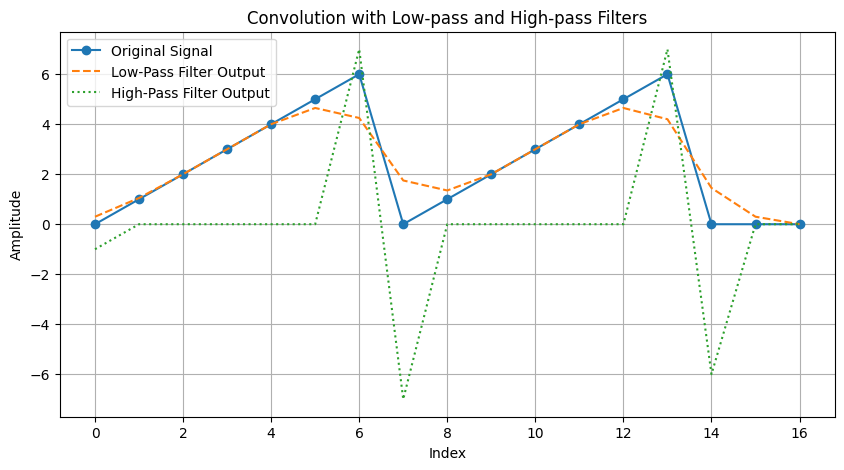

In [2]:
X = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]
H_H = [-1, 2, -1]

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Smoothing effect
y_high = np.convolve(X, H_H, mode='same')  # Edge detection effect

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", marker='o')
plt.plot(y_low, label="Low-Pass Filter Output", linestyle='dashed')
plt.plot(y_high, label="High-Pass Filter Output", linestyle='dotted')

# Labels and legend
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("Convolution with Low-pass and High-pass Filters")
plt.legend()
plt.grid()
plt.show()

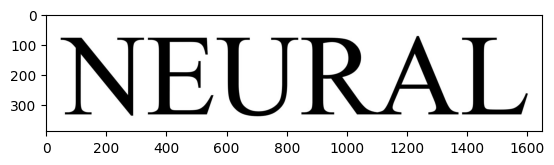

In [9]:
im = imread(r"/content/Neural.JPG")
img = rgb2gray(im)*255
plt.imshow(img, cmap='gray')



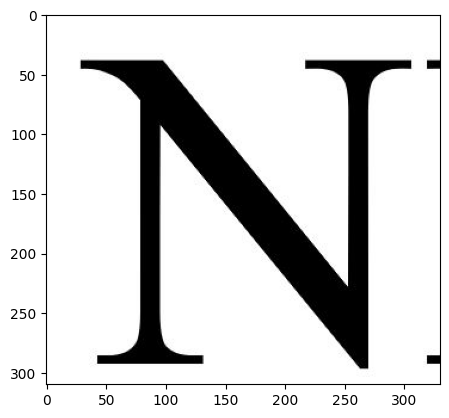

In [10]:
img1 = img[40:350, 20:350]
plt.imshow(img1, cmap='gray')
plt.show()

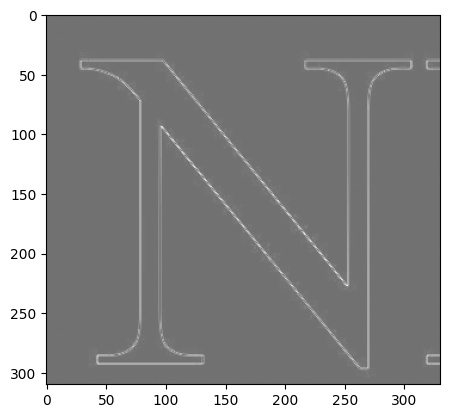

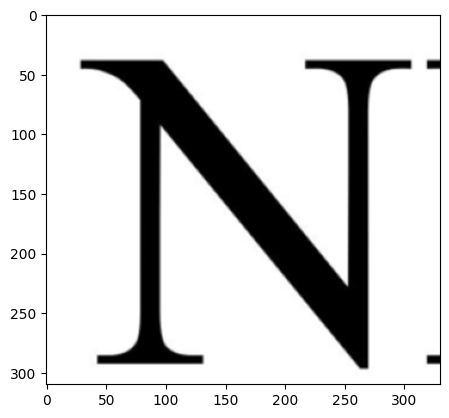

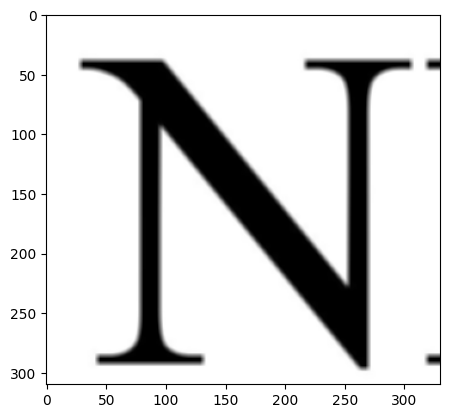

In [15]:
fil1 = np.array([[ 0, -1, 0],
 [-1, 4, -1],
 [ 0, -1, 0]])
fil2 = np.array([[ 0.2, 0.5, 0.2],
 [0.5, 1, 0.5],
 [0.2, 0.5, 0.2]])
fil3 = np.array([[ 0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1]])

grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')
plt.imshow(abs(grad1),cmap='gray',vmin=np.min(grad1),vmax = np.max(grad1)
)
plt.show()
plt.imshow(grad2,cmap='gray')
plt.show()
plt.imshow(grad3,cmap='gray')